In [61]:
import numpy as np
import matplotlib.pyplot as plt

"""
Here are the data files.  For all data files each image and label is on one row.  
The first 256 values in each row correspond to the 16x16 detector image and 
the last 6 values correspond to Energy1, Xpos1, Ypos1, Energy2, Xpos2, Ypos2.  
If there is no second particle then Energy2 = 0 and Xpos2 and Ypos2 are both -100.  
(When I run my model, I have to reset the -100 to 0).
 
CeBr10kSingle are 10,000 rows of data and labels for single interactions in the detector
CeBr10k_1.txt is 10,000 rows of data and labels with a mix of single interactions and double interactions
CeBr10.txt is a small file I use which contains 10 single interactions.
"""

# File import
PATH = "../data/small_sample/"
filenames = ["CeBr10ksingle.txt", "CeBr10k_1.txt", "CeBr10.txt"]

## single, mix, small define which dataset to load.
file_to_load = "small"

if file_to_load == "single":
    infile = PATH+filenames[0]
if file_to_load == "mix":
    infile = PATH+filenames[1]
if file_to_load == "small":
    infile = PATH+filenames[2]


data = np.loadtxt(infile)
n_pixels = data.shape[1] - 6 # the six params at the end are not part of the image
n_img = data.shape[0]
images = data[:, :n_pixels].reshape(n_img, 16, 16)# reshape to image dims
images = np.transpose(images, axes=[0, 2, 1]) # transpose to correct spatial orientation
energy_pos = data[:, n_pixels:] # Energy1, Xpos1, Ypos1, Energy2, Xpos2, Ypos2




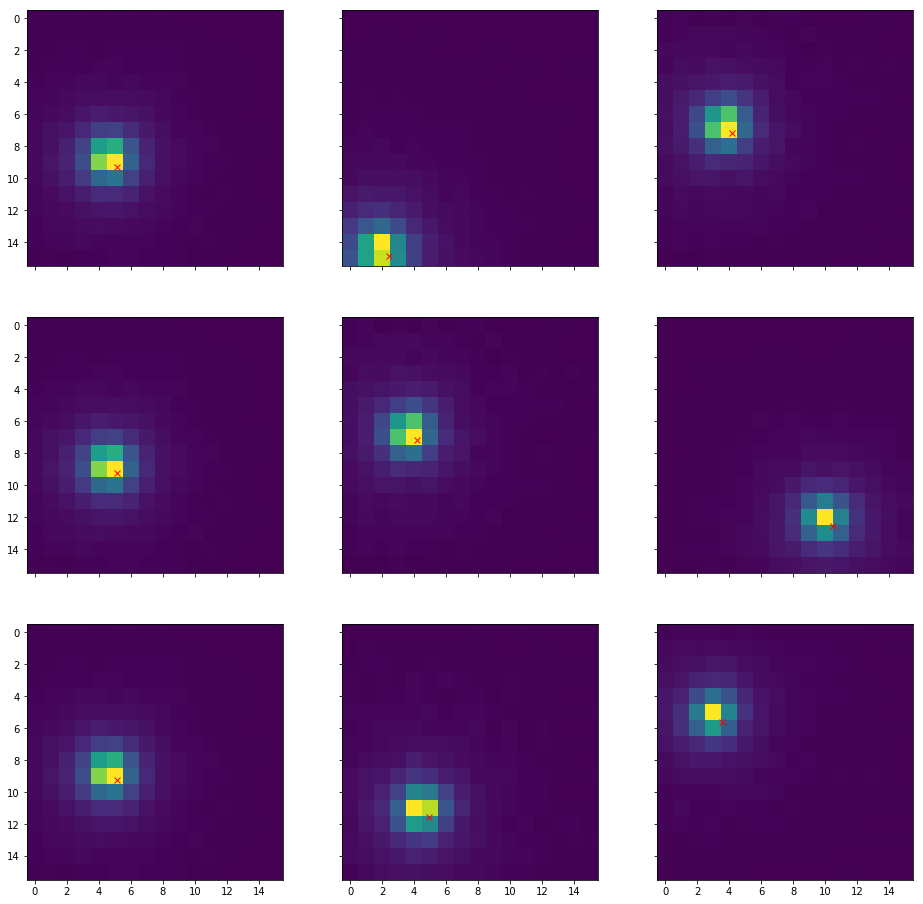

In [66]:
# Plot some images.
%matplotlib inline

fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(16,16))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].imshow(images[i*j + j])
        
        # plot origin of event
        x = energy_pos[i*j + j][1]
        y = energy_pos[i*j + j][2]
        ax[i, j].plot(x, y, 'rx')
plt.show()